<a href="https://colab.research.google.com/github/teobenko99/PRACTICA/blob/main/Practica_en_R.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#install.packages("GGally")
#install.packages("corrplot")
#install.packages("leaps")
#install.packages("gridExtra")
install.packages("psych")


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘mnormt’, ‘GPArotation’




Se cargar los paquetes Necesarios para el tratado del DS




In [ ]:
library(readr)
library(ggplot2)
library(dplyr)
library(tidyverse)
library(corrplot)
library(GGally)
library(leaps)
library(gridExtra)
library(leaps) #  para subsets
library(readxl)
library(psych)

pacientes<- read_xlsx("obesidad25.xlsx")
str(pacientes)
dim(pacientes)
pacientes_original <- pacientes

tibble [260 × 9] (S3: tbl_df/tbl/data.frame)
 $ grc    : num [1:260] 12.3 6.1 25.3 10.4 6.3 20.9 18.8 27 4.1 11.7 ...
 $ altura : num [1:260] 169 181 166 181 173 ...
 $ pecho  : num [1:260] 93.1 93.6 95.8 101.8 89.3 ...
 $ abdomen: num [1:260] 85.2 83 87.9 86.4 78.4 94.4 98.6 99.8 82.5 88.6 ...
 $ cadera : num [1:260] 94.5 98.7 99.2 101.2 96.1 ...
 $ muslo  : num [1:260] 59 58.7 59.6 60.1 56 66 56.5 56.3 62.9 63.1 ...
 $ rodilla: num [1:260] 37.3 37.3 38.9 37.3 37.4 42 39.3 36.6 38.3 41.7 ...
 $ tobillo: num [1:260] 21.9 23.4 24 22.8 22.4 25.6 22.7 22 23.8 25 ...
 $ munieca: num [1:260] 17.1 18.2 16.6 18.2 18.1 18.8 19 18 18.2 19.2 ...


[1] 260   9

📋 Diccionario de Datos

Variable	Tipo	Descripción	Unidades

---


*   grc     Numérica	Grasa corporal relativa (porcentaje).
*   altura	Numérica	Altura del individuo.
*   pecho	  Numérica	Circunferencia del pecho.
*   abdomen	Numérica	Circunferencia del abdomen.
*   cadera	Numérica	Circunferencia de la cadera.
*   muslo	  Numérica	Circunferencia del muslo.
*   rodilla	Numérica	Circunferencia de la rodilla.
*   tobillo	Numérica	Circunferencia del tobillo.
*   munieca	Numérica	Circunferencia de la muñeca.

No se observan variables Cualitativas o Factores para procesar





In [ ]:
varNumericas <- select_if(pacientes, is.numeric)
summary(varNumericas)


      grc            altura           pecho           abdomen      
 Min.   : 0.00   Min.   : 73.75   Min.   : 79.30   Min.   : 69.40  
 1st Qu.:12.47   1st Qu.:170.62   1st Qu.: 94.35   1st Qu.: 84.58  
 Median :19.20   Median :175.00   Median : 99.70   Median : 90.90  
 Mean   :19.07   Mean   :175.27   Mean   :100.82   Mean   : 92.52  
 3rd Qu.:25.23   3rd Qu.:180.62   3rd Qu.:105.60   3rd Qu.: 99.33  
 Max.   :47.50   Max.   :194.38   Max.   :136.20   Max.   :148.10  
                                                                   
     cadera           muslo          rodilla         tobillo     
 Min.   : 85.00   Min.   :47.20   Min.   :33.00   Min.   :19.10  
 1st Qu.: 95.47   1st Qu.:56.08   1st Qu.:36.98   1st Qu.:22.00  
 Median : 99.30   Median :59.05   Median :38.50   Median :22.80  
 Mean   : 99.88   Mean   :59.44   Mean   :38.60   Mean   :23.09  
 3rd Qu.:103.28   3rd Qu.:62.35   3rd Qu.:40.00   3rd Qu.:24.00  
 Max.   :147.70   Max.   :87.30   Max.   :49.10   Max.   :33

In [ ]:
fila_con_na <- which(is.na(pacientes$tobillo)) #buscamos la fila con valores faltantes en la variable Tobillo NA
print(fila_con_na)
pacientes <- na.omit(pacientes)
summary(pacientes)
dim(pacientes)

[1] 257


      grc            altura           pecho          abdomen      
 Min.   : 0.00   Min.   : 73.75   Min.   : 79.3   Min.   : 69.40  
 1st Qu.:12.45   1st Qu.:170.62   1st Qu.: 94.5   1st Qu.: 84.55  
 Median :19.20   Median :175.00   Median : 99.7   Median : 90.90  
 Mean   :19.02   Mean   :175.26   Mean   :100.9   Mean   : 92.48  
 3rd Qu.:25.20   3rd Qu.:180.62   3rd Qu.:105.6   3rd Qu.: 99.20  
 Max.   :47.50   Max.   :194.38   Max.   :136.2   Max.   :148.10  
     cadera           muslo          rodilla         tobillo     
 Min.   : 85.00   Min.   :47.20   Min.   :33.00   Min.   :19.10  
 1st Qu.: 95.50   1st Qu.:56.05   1st Qu.:36.95   1st Qu.:22.00  
 Median : 99.30   Median :59.00   Median :38.50   Median :22.80  
 Mean   : 99.91   Mean   :59.44   Mean   :38.60   Mean   :23.09  
 3rd Qu.:103.35   3rd Qu.:62.40   3rd Qu.:40.00   3rd Qu.:24.00  
 Max.   :147.70   Max.   :87.30   Max.   :49.10   Max.   :33.90  
    munieca     
 Min.   :15.80  
 1st Qu.:17.60  
 Median :18.30  
 

[1] 259   9

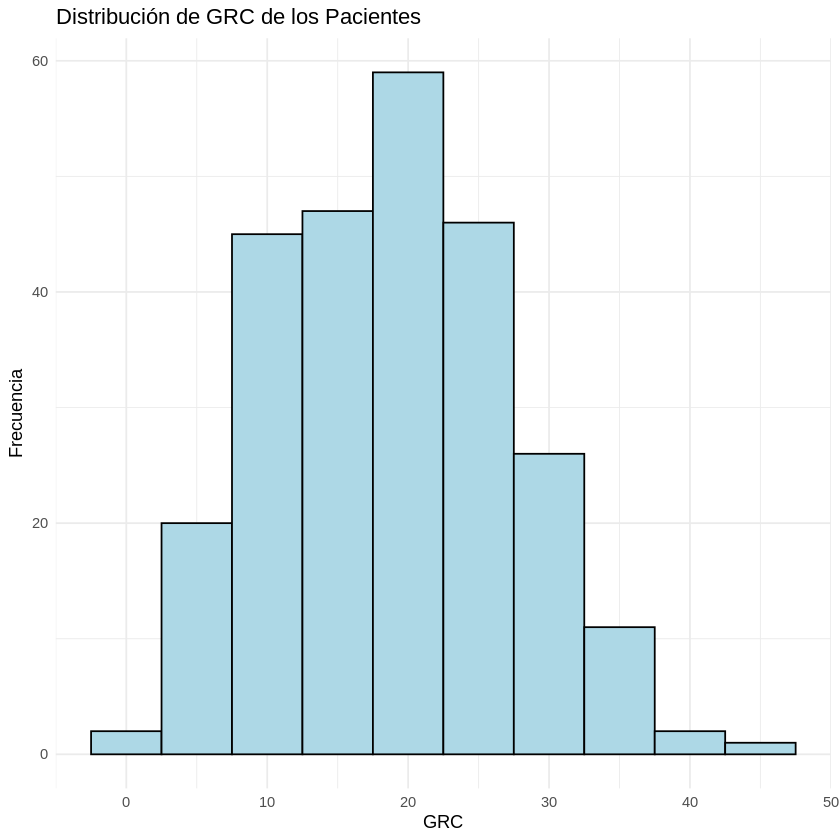

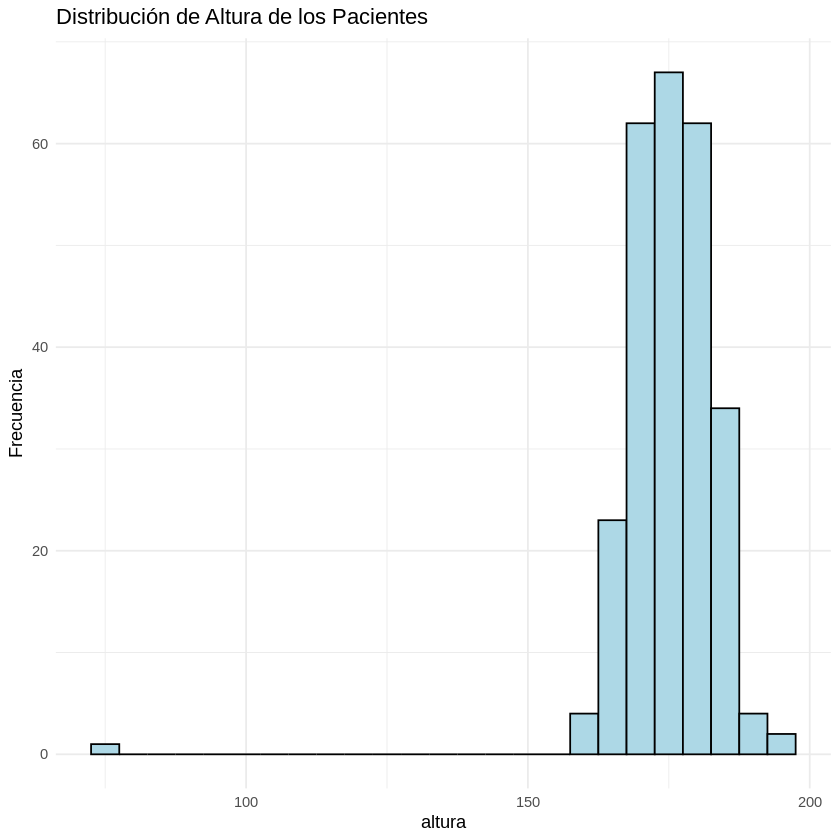

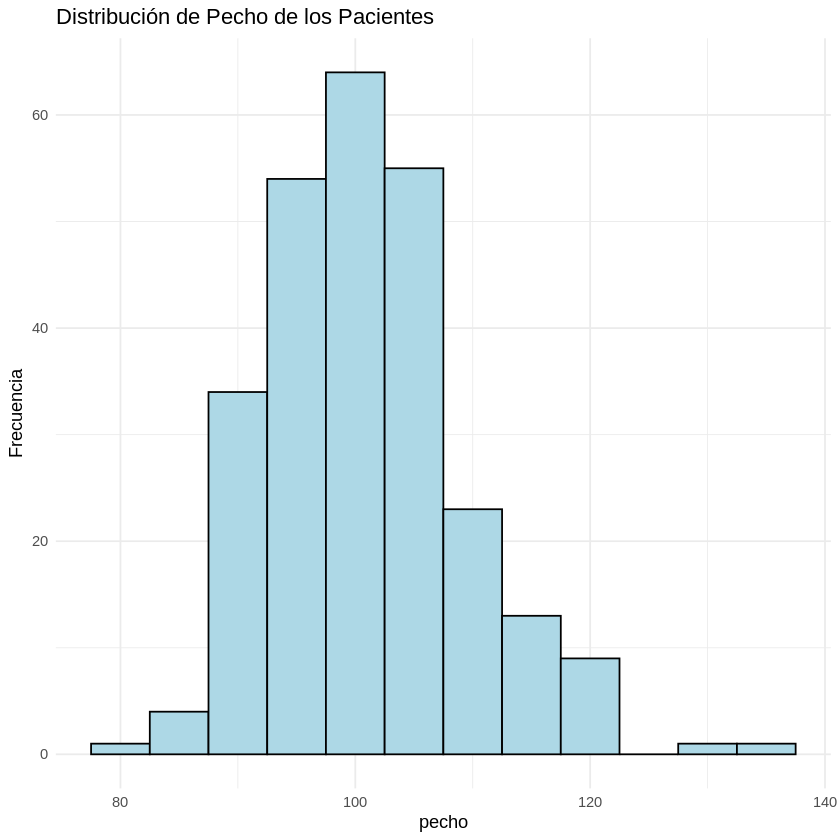

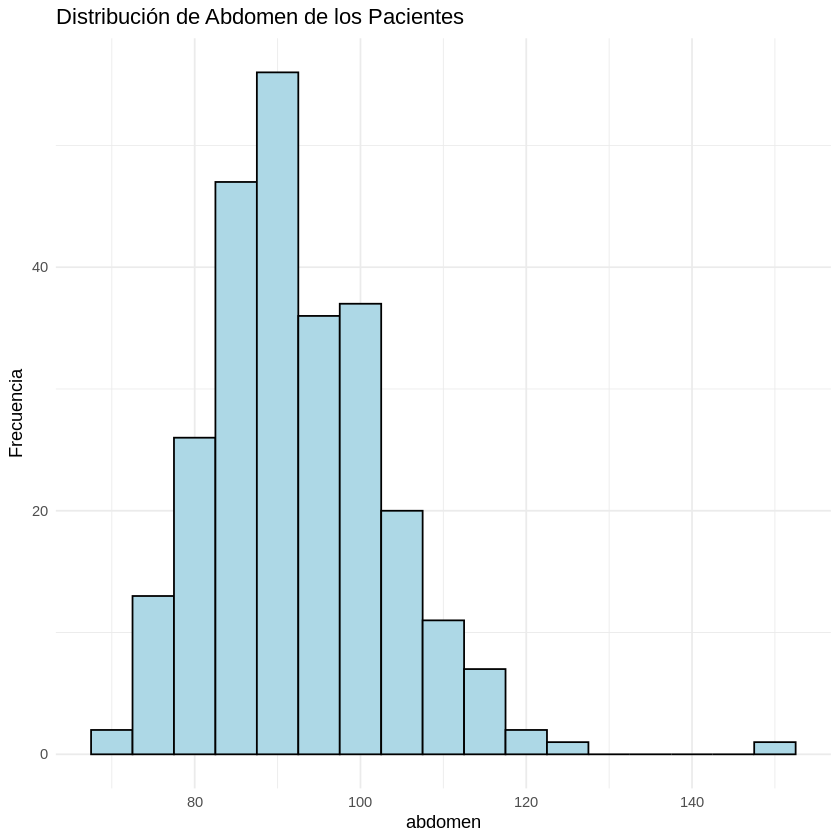

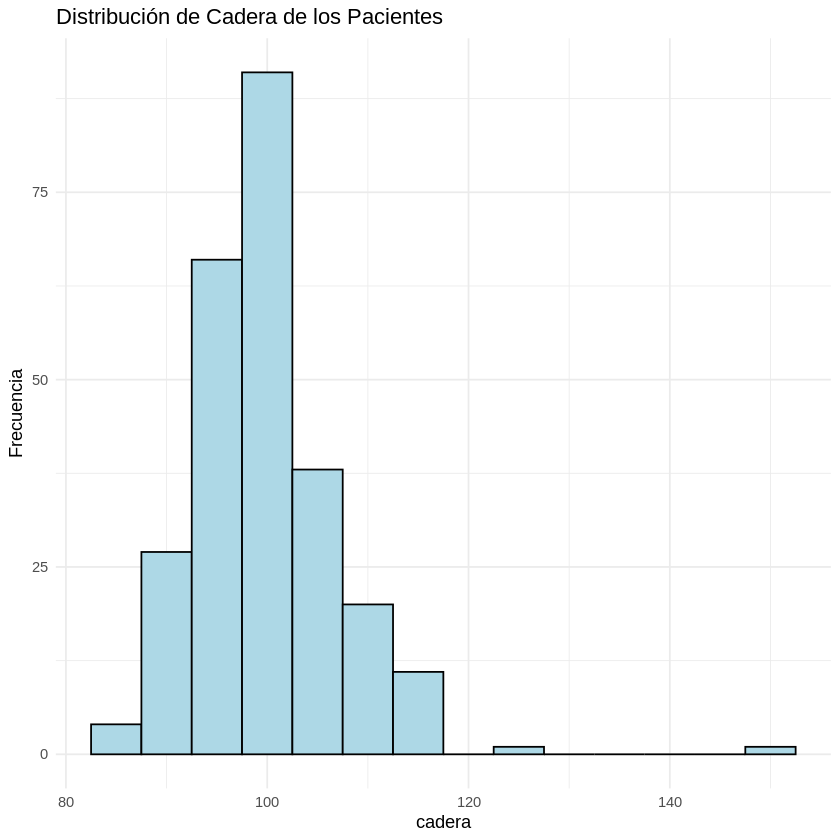

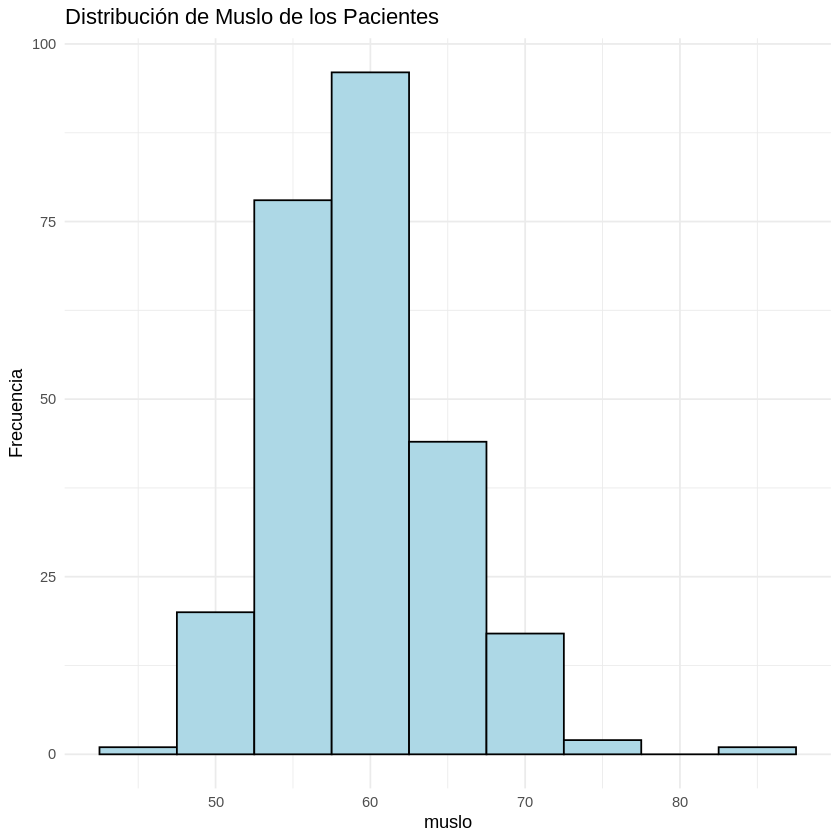

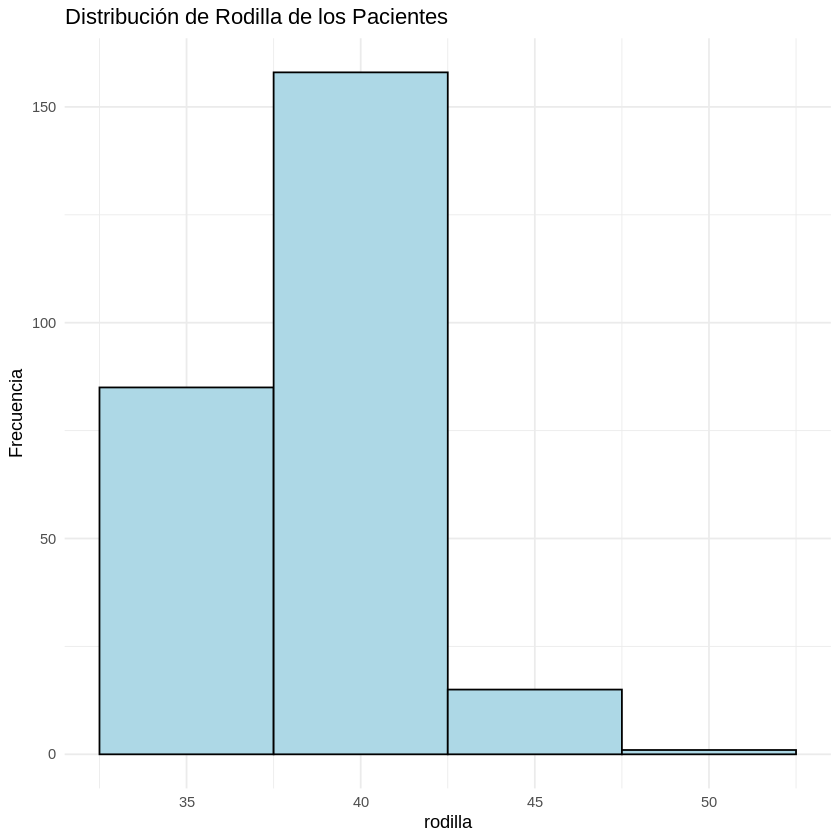

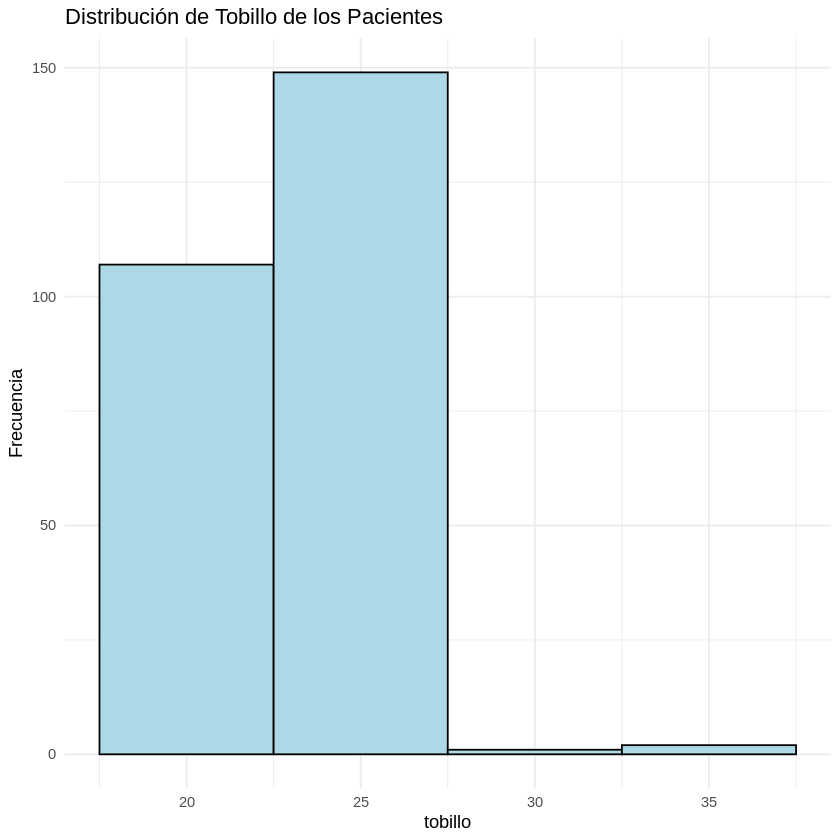

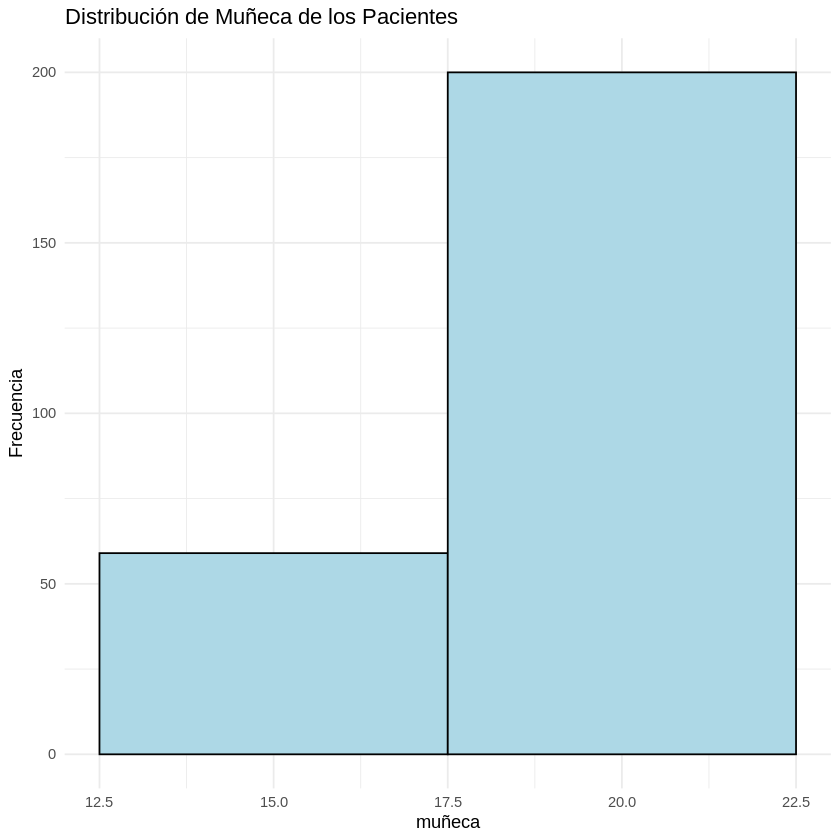

In [ ]:
ggplot(pacientes, aes(x = grc)) +
  geom_histogram(binwidth = 5, fill = "lightblue", color = "black") +
  labs(title = "Distribución de GRC de los Pacientes",
       x = "GRC",
       y = "Frecuencia") +
  theme_minimal()

ggplot(pacientes, aes(x = altura)) +
  geom_histogram(binwidth = 5, fill = "lightblue", color = "black") +
  labs(title = "Distribución de Altura de los Pacientes",
       x = "altura",
       y = "Frecuencia") +
  theme_minimal()

ggplot(pacientes, aes(x = pecho)) +
  geom_histogram(binwidth = 5, fill = "lightblue", color = "black") +
  labs(title = "Distribución de Pecho de los Pacientes",
       x = "pecho",
       y = "Frecuencia") +
  theme_minimal()

ggplot(pacientes, aes(x = abdomen)) +
  geom_histogram(binwidth = 5, fill = "lightblue", color = "black") +
  labs(title = "Distribución de Abdomen de los Pacientes",
       x = "abdomen",
       y = "Frecuencia") +
  theme_minimal()

ggplot(pacientes, aes(x = cadera)) +
  geom_histogram(binwidth = 5, fill = "lightblue", color = "black") +
  labs(title = "Distribución de Cadera de los Pacientes",
       x = "cadera",
       y = "Frecuencia") +
  theme_minimal()

ggplot(pacientes, aes(x = muslo)) +
  geom_histogram(binwidth = 5, fill = "lightblue", color = "black") +
  labs(title = "Distribución de Muslo de los Pacientes",
       x = "muslo",
       y = "Frecuencia") +
  theme_minimal()

ggplot(pacientes, aes(x = rodilla)) +
  geom_histogram(binwidth = 5, fill = "lightblue", color = "black") +
  labs(title = "Distribución de Rodilla de los Pacientes",
       x = "rodilla",
       y = "Frecuencia") +
  theme_minimal()

ggplot(pacientes, aes(x = tobillo)) +
  geom_histogram(binwidth = 5, fill = "lightblue", color = "black") +
  labs(title = "Distribución de Tobillo de los Pacientes",
       x = "tobillo",
       y = "Frecuencia") +
  theme_minimal()

ggplot(pacientes, aes(x = munieca)) +
  geom_histogram(binwidth = 5, fill = "lightblue", color = "black") +
  labs(title = "Distribución de Muñeca de los Pacientes",
       x = "muñeca",
       y = "Frecuencia") +
  theme_minimal()

`geom_smooth()` using formula = 'y ~ x'


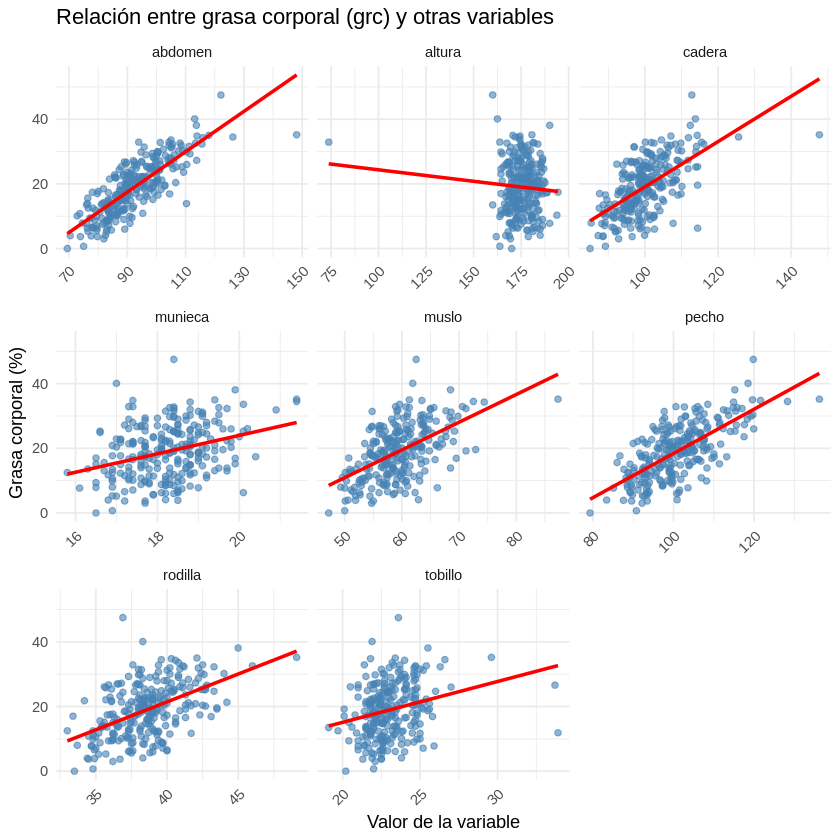

In [ ]:
datos_numericos <- pacientes %>%
  select_if(is.numeric) %>%
  select(-grc)

# Crear gráficos de dispersión de grc vs. todas las demás variables
datos_long <- pacientes %>%
  pivot_longer(
    cols = -grc,
    names_to = "variable",
    values_to = "valor"
  )

ggplot(datos_long, aes(x = valor, y = grc)) +
  geom_point(color = "steelblue", alpha = 0.6) +
  geom_smooth(method = "lm", color = "red", se = FALSE) +  # Línea de tendencia
  facet_wrap(~ variable, scales = "free_x", ncol = 3) +    # 3 columnas
  labs(
    title = "Relación entre grasa corporal (grc) y otras variables",
    x = "Valor de la variable",
    y = "Grasa corporal (%)"
  ) +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))

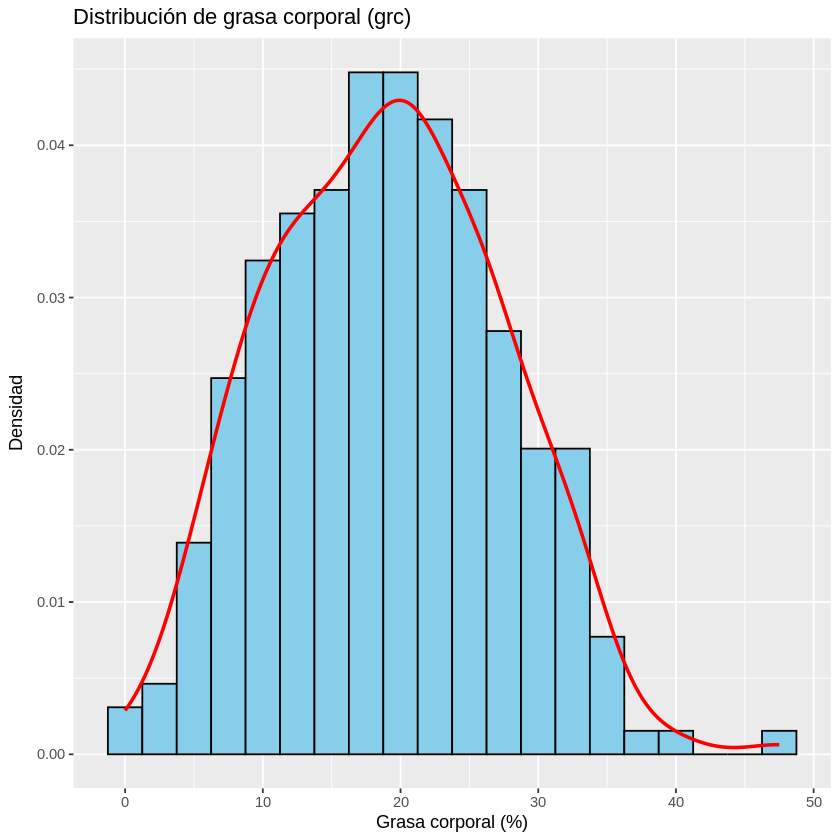

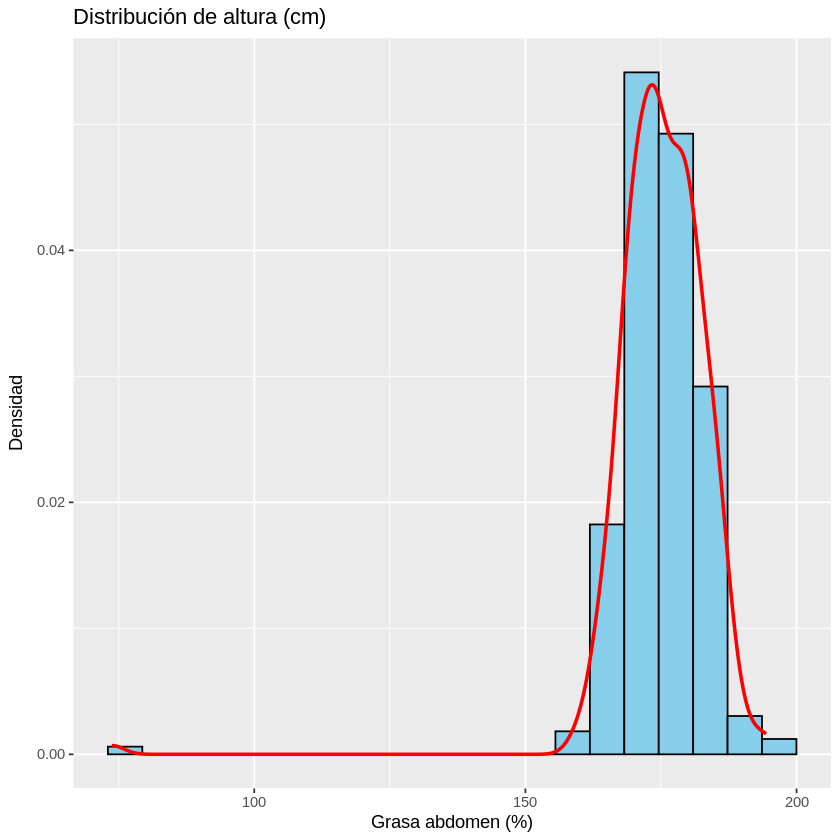

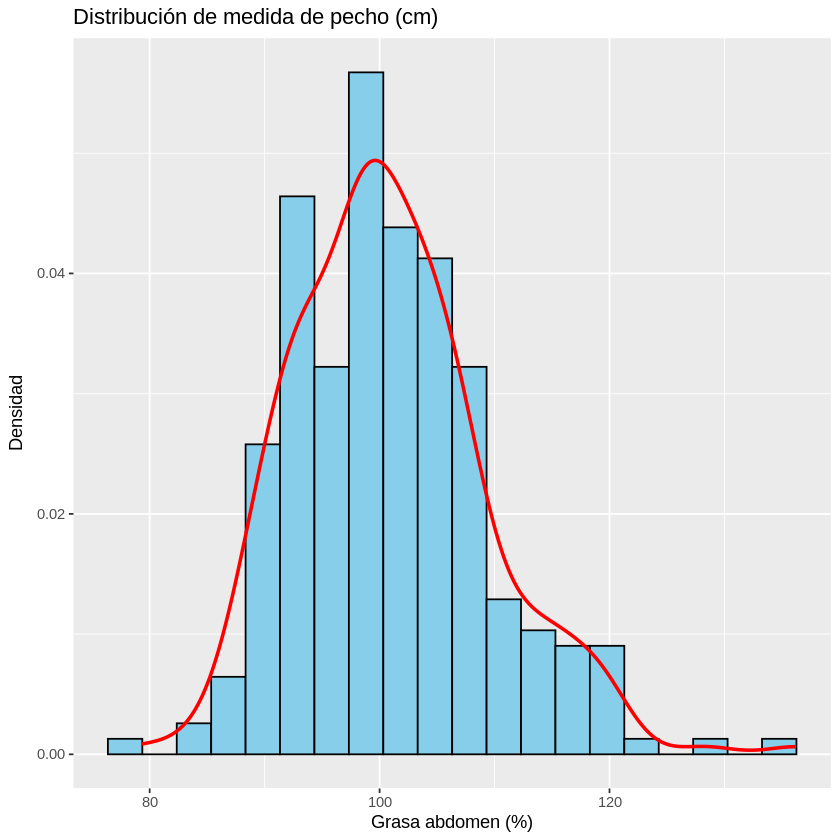

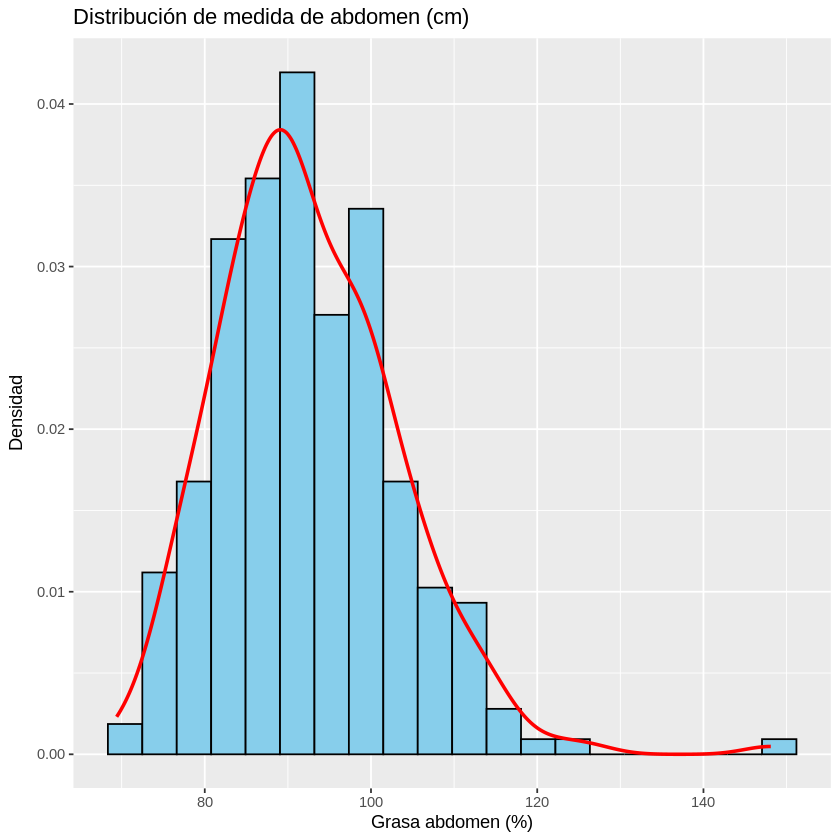

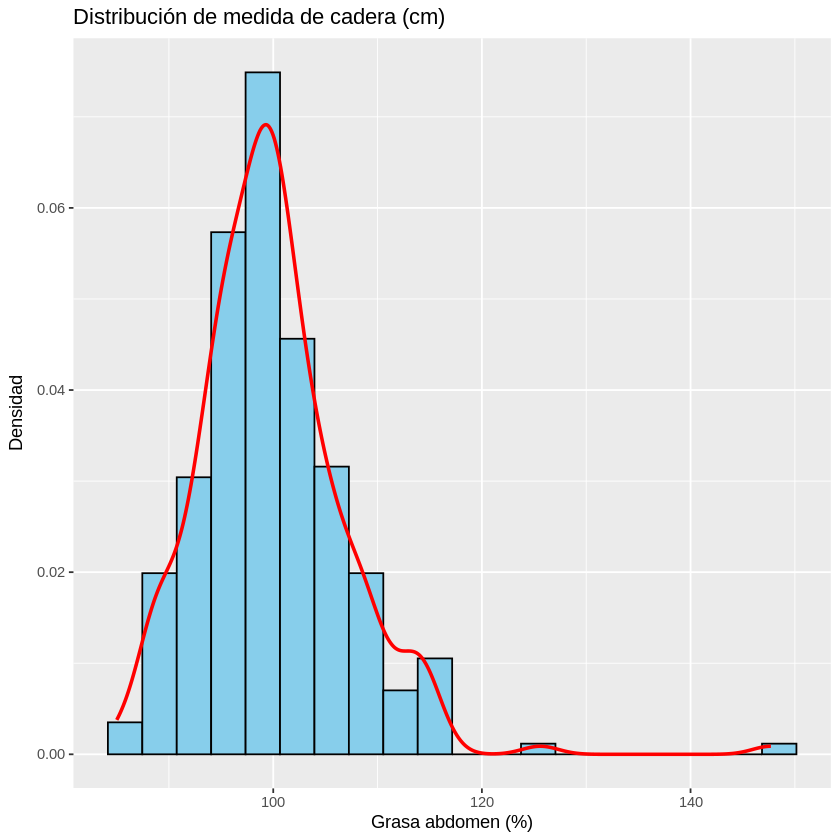

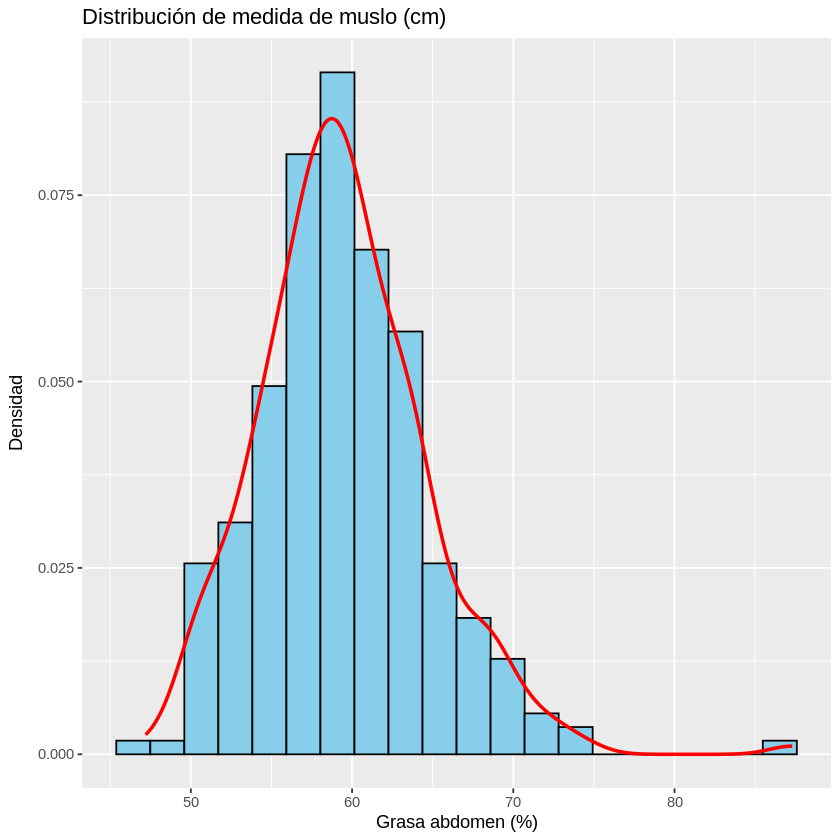

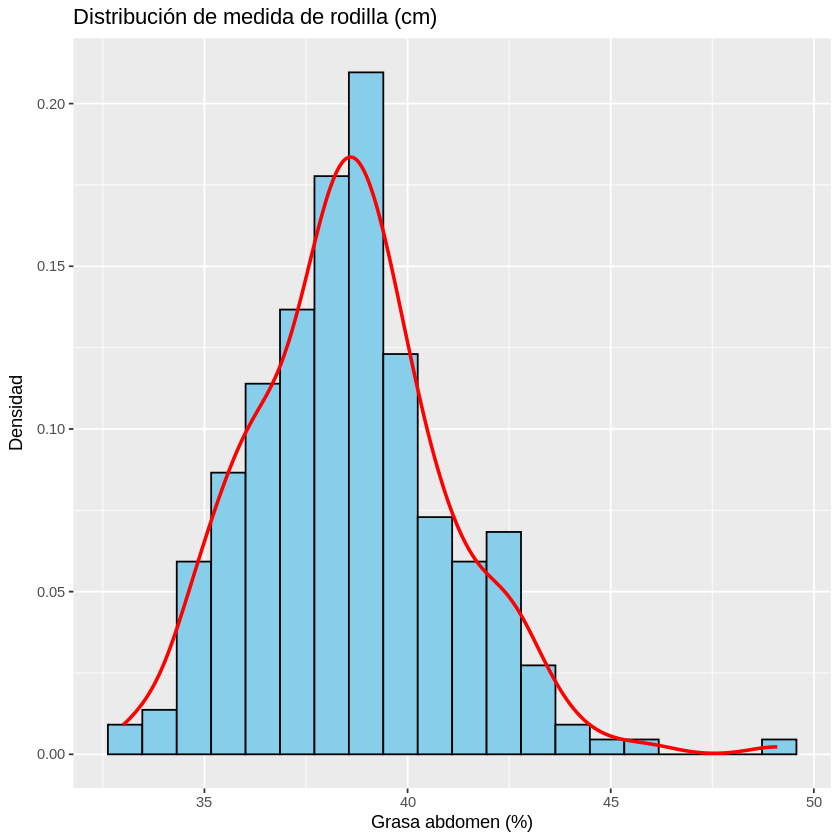

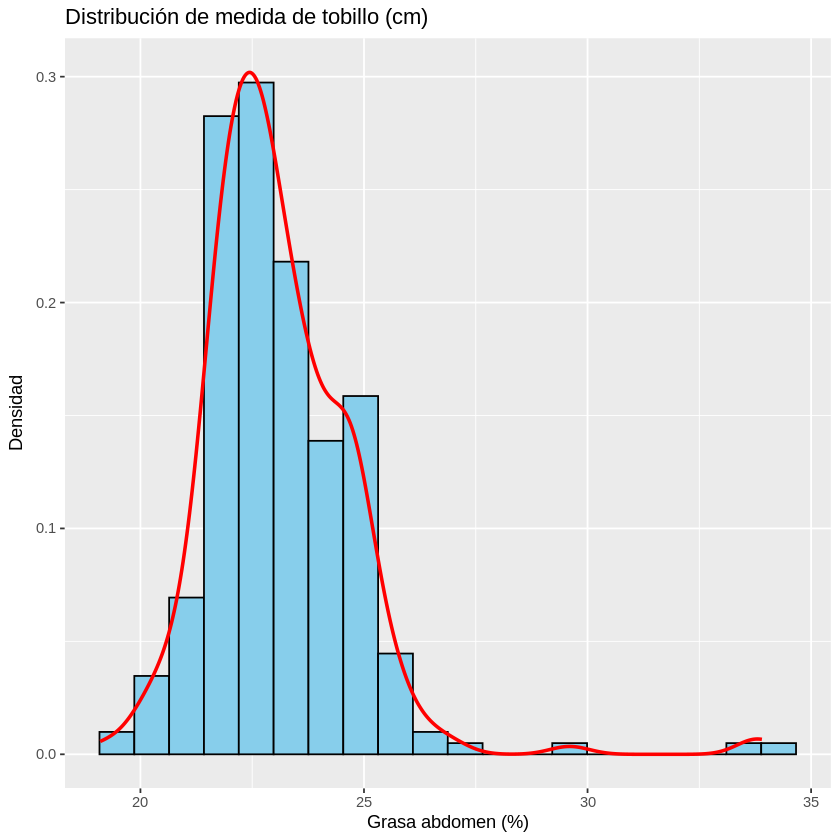

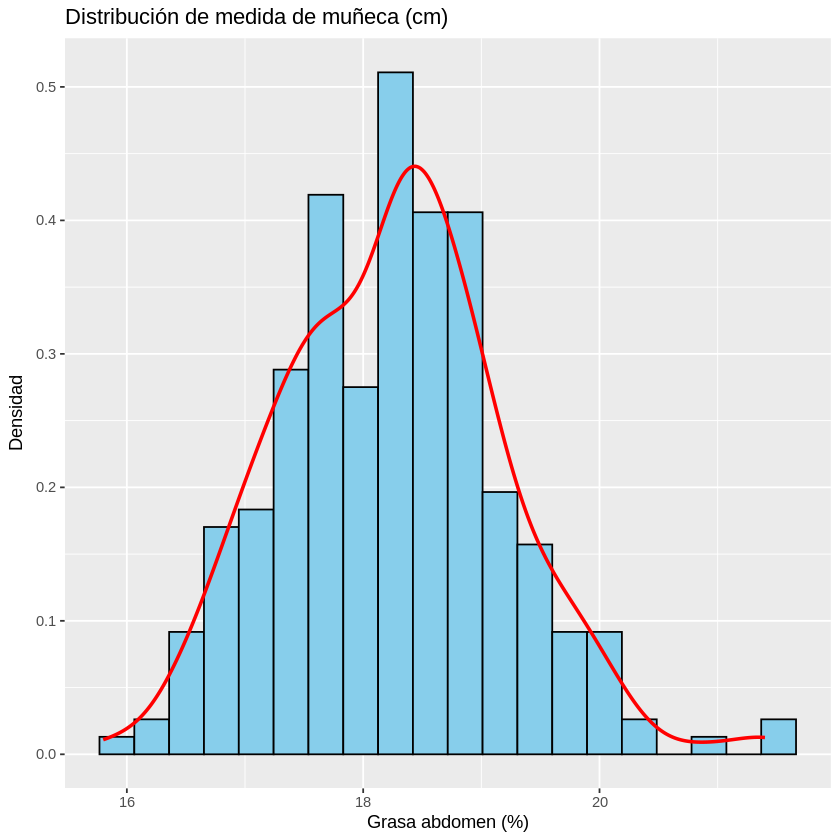

In [ ]:
ggplot(pacientes, aes(x = grc)) +
  geom_histogram(
    aes(y = after_stat(density)),
    fill = "skyblue",
    color = "black",
    bins = 20
  ) +
  geom_density(color = "red", linewidth = 1) +
  labs(
    title = "Distribución de grasa corporal (grc)",
    x = "Grasa corporal (%)",
    y = "Densidad"
  )

  ggplot(pacientes, aes(x = altura)) +
  geom_histogram(
    aes(y = after_stat(density)),
    fill = "skyblue",
    color = "black",
    bins = 20
  ) +
  geom_density(color = "red", linewidth = 1) +
  labs(
    title = "Distribución de altura (cm)",
    x = "Grasa abdomen (%)",
    y = "Densidad"
  )

  ggplot(pacientes, aes(x = pecho)) +
  geom_histogram(
    aes(y = after_stat(density)),
    fill = "skyblue",
    color = "black",
    bins = 20
  ) +
  geom_density(color = "red", linewidth = 1) +
  labs(
    title = "Distribución de medida de pecho (cm)",
    x = "Grasa abdomen (%)",
    y = "Densidad"
  )

  ggplot(pacientes, aes(x = abdomen)) +
  geom_histogram(
    aes(y = after_stat(density)),
    fill = "skyblue",
    color = "black",
    bins = 20
  ) +
  geom_density(color = "red", linewidth = 1) +
  labs(
    title = "Distribución de medida de abdomen (cm)",
    x = "Grasa abdomen (%)",
    y = "Densidad"
  )

  ggplot(pacientes, aes(x = cadera)) +
  geom_histogram(
    aes(y = after_stat(density)),
    fill = "skyblue",
    color = "black",
    bins = 20
  ) +
  geom_density(color = "red", linewidth = 1) +
  labs(
    title = "Distribución de medida de cadera (cm)",
    x = "Grasa abdomen (%)",
    y = "Densidad"
  )

  ggplot(pacientes, aes(x = muslo)) +
  geom_histogram(
    aes(y = after_stat(density)),
    fill = "skyblue",
    color = "black",
    bins = 20
  ) +
  geom_density(color = "red", linewidth = 1) +
  labs(
    title = "Distribución de medida de muslo (cm)",
    x = "Grasa abdomen (%)",
    y = "Densidad"
  )

  ggplot(pacientes, aes(x = rodilla)) +
  geom_histogram(
    aes(y = after_stat(density)),
    fill = "skyblue",
    color = "black",
    bins = 20
  ) +
  geom_density(color = "red", linewidth = 1) +
  labs(
    title = "Distribución de medida de rodilla (cm)",
    x = "Grasa abdomen (%)",
    y = "Densidad"
  )

  ggplot(pacientes, aes(x = tobillo)) +
  geom_histogram(
    aes(y = after_stat(density)),
    fill = "skyblue",
    color = "black",
    bins = 20
  ) +
  geom_density(color = "red", linewidth = 1) +
  labs(
    title = "Distribución de medida de tobillo (cm)",
    x = "Grasa abdomen (%)",
    y = "Densidad"
  )

  ggplot(pacientes, aes(x = munieca)) +
  geom_histogram(
    aes(y = after_stat(density)),
    fill = "skyblue",
    color = "black",
    bins = 20
  ) +
  geom_density(color = "red", linewidth = 1) +
  labs(
    title = "Distribución de medida de muñeca (cm)",
    x = "Grasa abdomen (%)",
    y = "Densidad"
  )

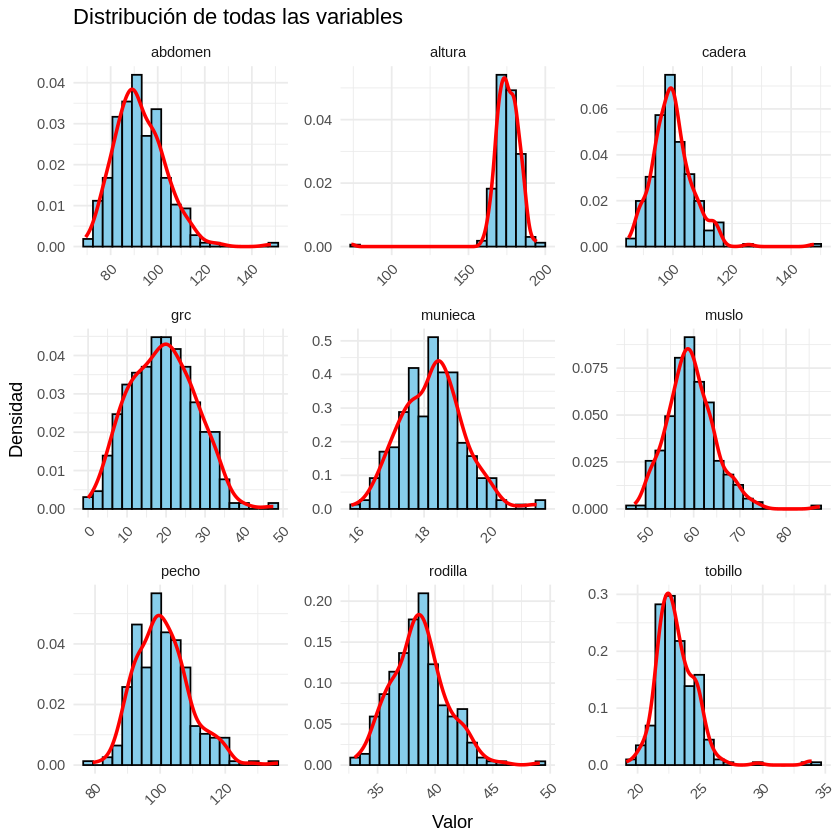

In [ ]:
# Pivotear los datos a formato largo
pacientes_long <- pacientes %>%
  pivot_longer(cols = everything(), names_to = "variable", values_to = "valor")

# Crear el gráfico unificado
ggplot(pacientes_long, aes(x = valor)) +
  geom_histogram(
    aes(y = after_stat(density)),
    fill = "skyblue",
    color = "black",
    bins = 20
  ) +
  geom_density(color = "red", linewidth = 1) +
  facet_wrap(~ variable, scales = "free", ncol = 3) +  # 3 columnas
  labs(
    title = "Distribución de todas las variables",
    x = "Valor",
    y = "Densidad"
  ) +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))

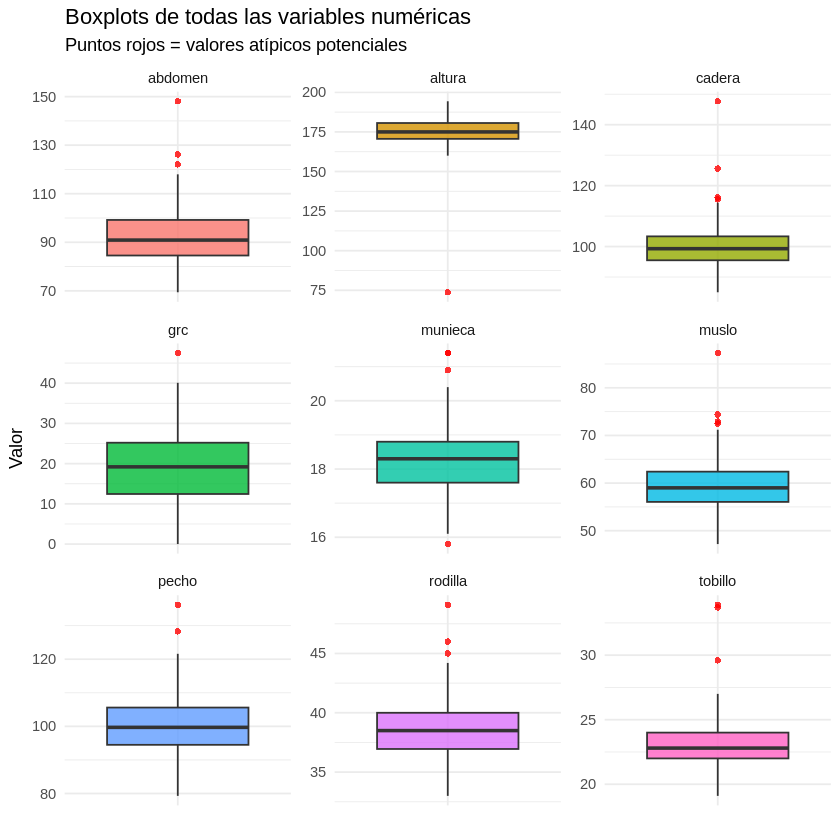

In [ ]:
pacientes_long <- pacientes %>%
  select_if(is.numeric) %>%
  pivot_longer(everything(), names_to = "variable", values_to = "valor")

# Boxplot con facetas
ggplot(pacientes_long, aes(x = variable, y = valor, fill = variable)) +
  geom_boxplot(alpha = 0.8, outlier.color = "red", outlier.shape = 16) +
  facet_wrap(~variable, scales = "free", ncol = 3) +  # 3 columnas
  labs(
    title = "Boxplots de todas las variables numéricas",
    subtitle = "Puntos rojos = valores atípicos potenciales",
    x = "",
    y = "Valor"
  ) +
  theme_minimal() +
  theme(
    axis.text.x = element_blank(),  # Ocultar nombres en eje X (ya están en facetas)
    legend.position = "none"
  )

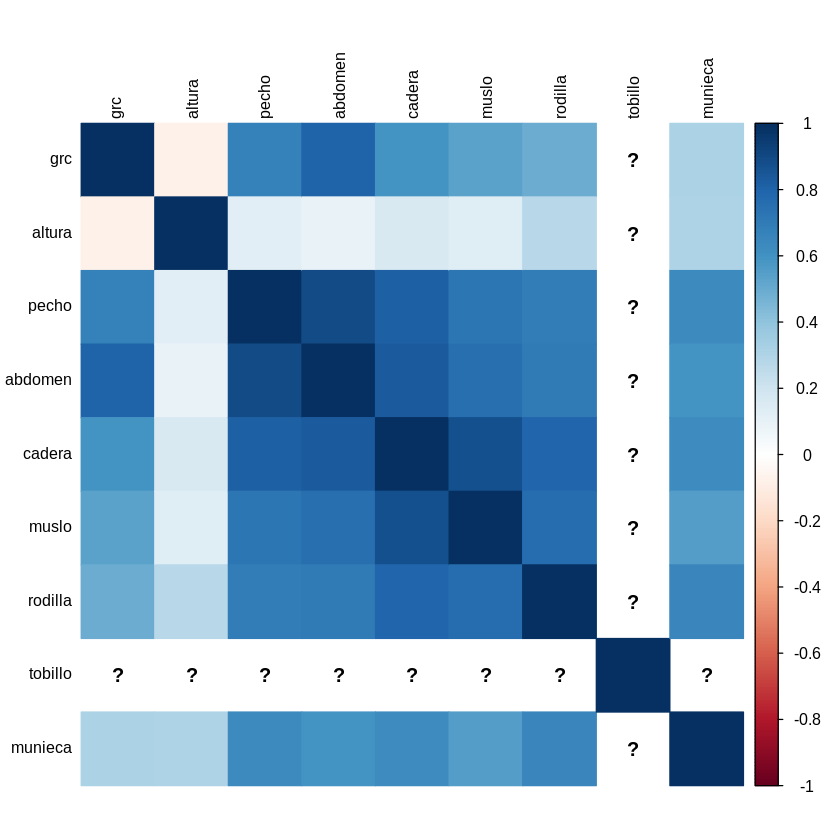

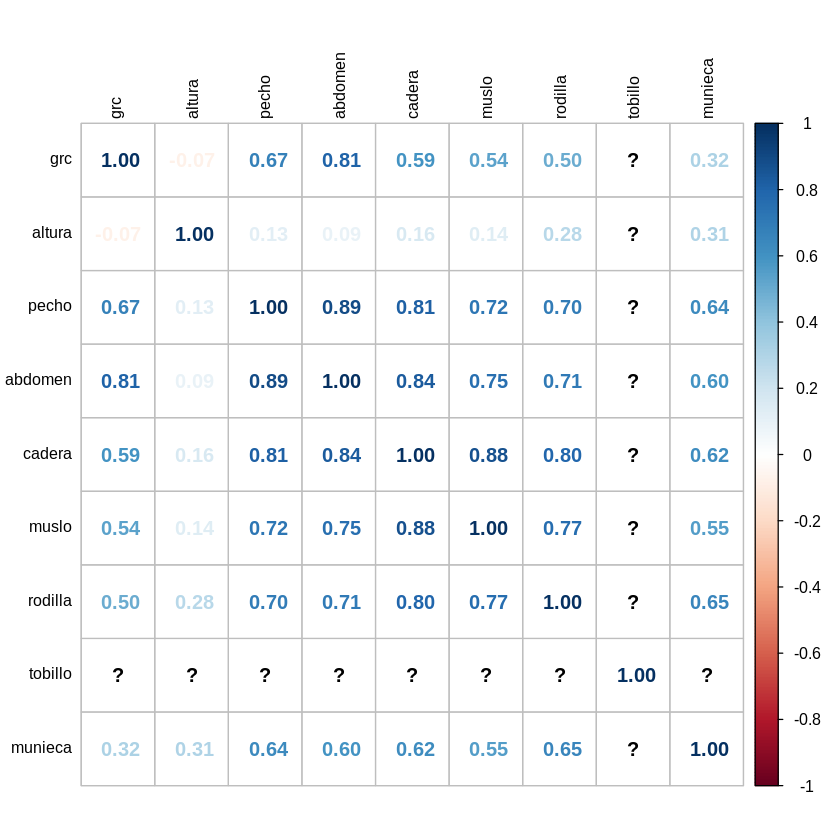

In [ ]:
correl <- cor(varNumericas)
corrplot(correl, method="color", tl.col="black", tl.cex=0.8)
corrplot(correl, method="number",tl.col="black",tl.cex=0.8)

In [ ]:
mod1<-lm(grc ~ altura+pecho+abdomen+cadera+muslo+rodilla+tobillo+munieca, data = datos)
summary(mod1)


Call:
lm(formula = grc ~ altura + pecho + abdomen + cadera + muslo + 
    rodilla + tobillo + munieca, data = datos)

Residuals:
     Min       1Q   Median       3Q      Max 
-16.2079  -3.1973  -0.3396   3.4423  10.1878 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  6.55833    7.20878   0.910 0.363820    
altura      -0.08937    0.03391  -2.635 0.008934 ** 
pecho       -0.04506    0.08300  -0.543 0.587722    
abdomen      0.84821    0.06892  12.306  < 2e-16 ***
cadera      -0.21506    0.10841  -1.984 0.048377 *  
muslo       -0.05488    0.11826  -0.464 0.643023    
rodilla      0.31608    0.21957   1.440 0.151241    
tobillo     -0.09524    0.21865  -0.436 0.663503    
munieca     -1.70018    0.44582  -3.814 0.000173 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 4.55 on 250 degrees of freedom
  (1 observation deleted due to missingness)
Multiple R-squared:  0.7109,	Adjusted R-squared:  0.7016 
F-stat